
## KMeans - Agrupamento de Dados

## Importando bibliotecas ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Carregando a base de dados iris

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


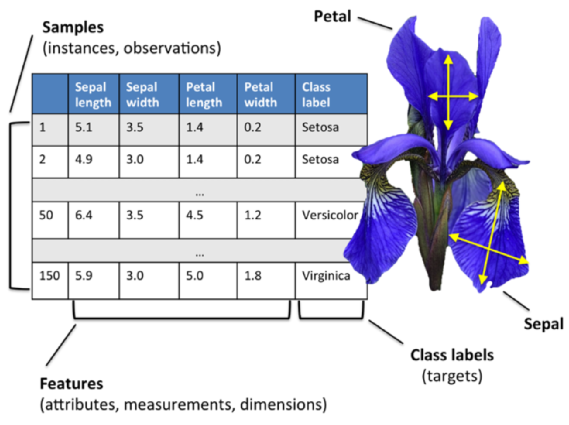

In [382]:
from IPython.display import Image
Image(filename ="iris-data-set.png", width=500, height=500)

## Separando os valores de dados e classes

In [4]:
X = iris.drop('Species',axis=1)
X[:10]

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [5]:
y = iris.Species
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Convertendo valores categórios de classe em numéricos

In [6]:
def converte_classe(l):
    if l == 'Iris-virginica':
        return 0
    elif l == 'Iris-setosa':
        return 1
    elif l == 'Iris-versicolor':
        return 2

In [7]:
y = y.apply(converte_classe)
y.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

## Instânciando o Algoritmo K-means com 3 clusters ##

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'random')

In [9]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

## Centroids ##

In [10]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

## Tabela de distância ##

In [11]:
distance = kmeans.fit_transform(X)
distance

array([[5.0595416 , 3.41925061, 0.14694217],
       [5.11494335, 3.39857426, 0.43816892],
       [5.27935534, 3.56935666, 0.41230086],
       [5.15358977, 3.42240962, 0.51883716],
       [5.10433388, 3.46726403, 0.19796969],
       [4.68148797, 3.14673162, 0.68380699],
       [5.21147652, 3.51650264, 0.41520116],
       [5.00252706, 3.33654987, 0.0599333 ],
       [5.32798107, 3.57233779, 0.80099438],
       [5.06790865, 3.3583767 , 0.36659514],
       [4.89806763, 3.32449131, 0.48784424],
       [4.9966845 , 3.31126872, 0.25138019],
       [5.19103612, 3.46661272, 0.49192682],
       [5.65173594, 3.90578362, 0.90906105],
       [5.10804455, 3.646649  , 1.02019214],
       [4.88564095, 3.49427881, 1.21309192],
       [5.03090587, 3.495248  , 0.66241377],
       [5.02342022, 3.38444981, 0.1509702 ],
       [4.61792995, 3.11245944, 0.82848778],
       [4.97213426, 3.37738931, 0.39898872],
       [4.6955761 , 3.07471224, 0.46172719],
       [4.9236821 , 3.31506588, 0.33762701],
       [5.

In [12]:
distance[0]

array([5.0595416 , 3.41925061, 0.14694217])

## Visualizando valores de distância para cada cluster ##

<IPython.core.display.Javascript object>


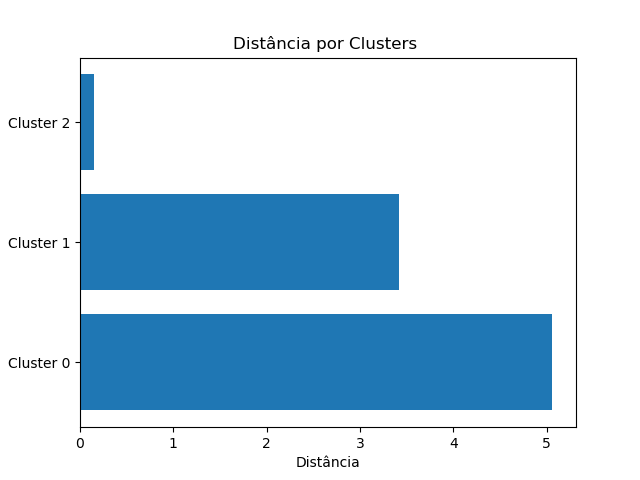

In [13]:
%matplotlib notebook
x = ['Cluster 0','Cluster 1','Cluster 2']
plt.barh(x,distance[0])
plt.xlabel('Distância')
plt.title('Distância por Clusters ')
plt.show()

## Imprimindo Rótulos ##

In [14]:
labels = kmeans.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

## Visualizando os Centroids ##

<IPython.core.display.Javascript object>


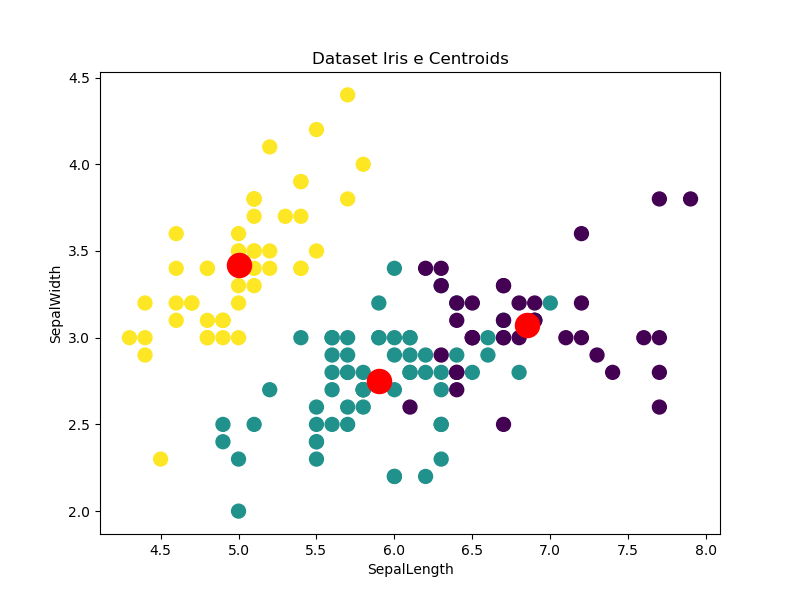

In [15]:
%matplotlib notebook
plt.figure(figsize=(8,6))
plt.scatter(X['SepalLength'], X['SepalWidth'], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Dataset Iris e Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.show()

## Agrupando novos dados ##

In [16]:
data = [
        [ 4.12, 3.4, 1.6, 0.7],
        [ 5.2, 5.8, 5.2, 6.7],
        [ 3.1, 3.5, 3.3, 3.0]
    ]
kmeans.predict(data)

array([2, 0, 1])

## Visualizando os resultados ##

<IPython.core.display.Javascript object>


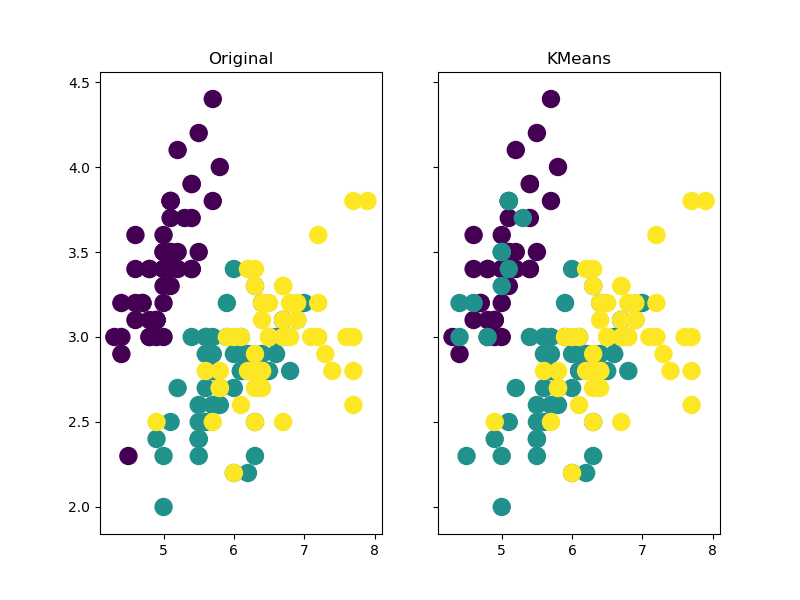

In [17]:
%matplotlib notebook
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))
ax1.set_title('Original')
ax1.scatter(X['SepalLength'], X['SepalWidth'],s=150,c=sorted(y))
ax2.set_title('KMeans')
ax2.scatter(X['SepalLength'], X['SepalWidth'],s=150,c=sorted(kmeans.labels_))

## Estimando o valor do parametro K - Método Elbow

1 680.8244
2 152.36870647733906
3 78.94084142614602
4 57.31787321428571
5 46.56163015873016
6 38.93873974358974
7 36.84379834054834
8 32.13127325890484
9 28.09474914413073
10 26.53548124098124


<IPython.core.display.Javascript object>


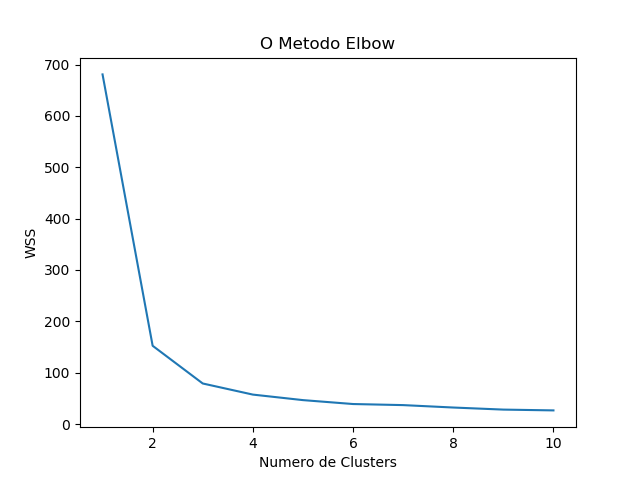

In [18]:
%matplotlib notebook
wcss = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters = i, init = 'random')
    kmeans2.fit(X)
    print (i,kmeans2.inertia_)
    wcss.append(kmeans2.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

## Técnicas de Validação

### Matriz de Confusão

In [19]:
print (pd.crosstab(y,kmeans.labels_, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2  All
Real                    
0        36  14   0   50
1         0   0  50   50
2         2  48   0   50
All      38  62  50  150


### Metricas de classificação

In [20]:
from sklearn import metrics
clusters = ['Cluster 2','Cluster 1','Cluster 0']
print(metrics.classification_report(y,kmeans.labels_,target_names=clusters))

              precision    recall  f1-score   support

   Cluster 2       0.95      0.72      0.82        50
   Cluster 1       0.00      0.00      0.00        50
   Cluster 0       0.00      0.00      0.00        50

    accuracy                           0.24       150
   macro avg       0.32      0.24      0.27       150
weighted avg       0.32      0.24      0.27       150

